In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #加载一些统计的库

In [2]:
data = pd.read_table('train.txt',sep=' ',index_col=False) 
print('item_category_list_ing')
for i in range(3):
    data['category_%d'%(i)] = data['item_category_list'].apply(
        lambda x:x.split(";")[i] if len(x.split(";")) > i else " "
    )
del data['item_category_list']

print('item_property_list_ing')
for i in range(3):
    data['property_%d'%(i)] = data['item_property_list'].apply(
        lambda x:x.split(";")[i] if len(x.split(";")) > i else " "
    )
del data['item_property_list']

item_category_list_ing
item_property_list_ing


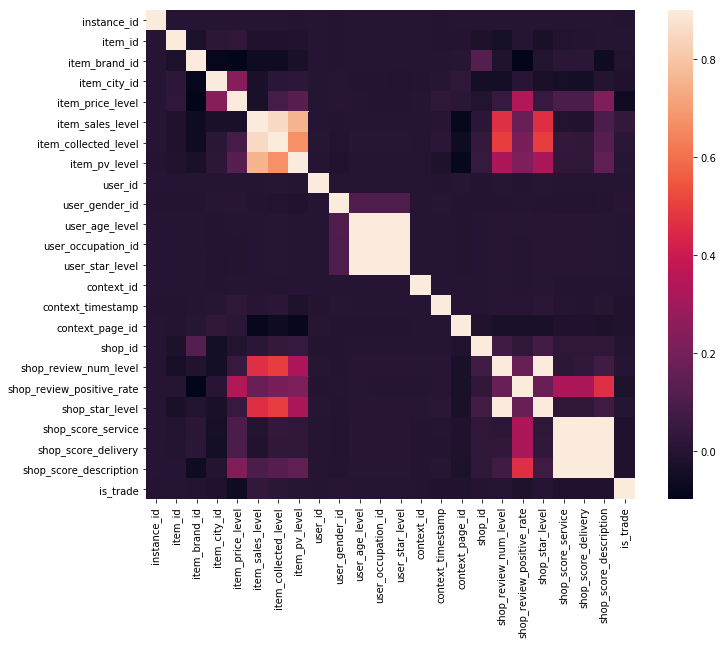

In [3]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [3]:
import time

In [58]:
# user_count.rename(columns={0: 'user_count'}, inplace=True)

Index(['item_id', 'item_brand_id', 'item_city_id', 'item_price_level',
       'item_sales_level', 'item_collected_level', 'item_pv_level', 'user_id',
       'user_gender_id', 'user_age_level', 'user_occupation_id',
       'user_star_level', 'context_id', 'context_timestamp', 'context_page_id',
       'predict_category_property', 'shop_id', 'shop_review_num_level',
       'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
       'shop_score_delivery', 'shop_score_description', 'is_trade',
       'category_0', 'category_1', 'category_2', 'property_0', 'property_1',
       'property_2'],
      dtype='object')

In [177]:
# data['love'] = data[['user_occupation_id','user_star_level']].groupby('user_occupation_id').aggregate(['sum', 'min'] )
# data[['user_occupation_id','item_price_level','is_trade']].groupby(['user_occupation_id','item_price_level']).agg(sum)
# data[['user_occupation_id','property_0','is_trade']].groupby(['user_occupation_id','property_0']).aggregate(['sum', 'count'])
# temp = data[['user_gender_id','item_brand_id','is_trade']].groupby(['user_gender_id','item_brand_id']).aggregate(['sum', 'count'])
# temp.groupby(['user_gender_id']).size()
# pd.merge(data,temp,on=['user_gender_id','item_brand_id'],how='left')
# temp2 = temp.reset_index()
# temp1.groupby(['user_gender_id'],as_index=False).sum()
# temp.groupby('user_gender_id').sum()
temp = data[['user_gender_id','item_brand_id','is_trade']].groupby(['user_gender_id','item_brand_id']).aggregate('count')
temp1 = temp.reset_index()
temp2 = temp.groupby('user_gender_id').sum().reset_index()
temp3 = pd.merge(temp1,temp2,on=['user_gender_id'],how='left')
temp4 = temp3[['is_trade_x']].rename(columns=({'is_trade_x':'sum'}))/temp3[['is_trade_y']].rename(columns=({'is_trade_y':'sum'}))
temp3['pv'] = temp4

In [209]:
temp = data[['user_gender_id','item_brand_id','instance_id']].groupby(['user_gender_id','item_brand_id']).aggregate('count')
temp1 = temp.reset_index()
temp2 = temp.groupby('user_gender_id').sum().reset_index()
temp3 = pd.merge(temp1,temp2,on=['user_gender_id'],how='left')
temp4 = temp3[['instance_id_x']].rename(columns=({'instance_id_x':'sum'}))/temp3[['instance_id_y']].rename(columns=({'instance_id_y':'sum'}))
temp3['pv'] = temp4
temp3.drop('instance_id_x', axis=1, inplace=True)
temp3.drop('instance_id_y', axis=1, inplace=True)
# pd.merge(data,temp3,on=['user_gender_id','property_0'],how='left')
# temp3[temp3['item_brand_id']==9132883203614799821]
temp3

,user_gender_id,item_brand_id,pv
0,-1,-1,0.001860
1,-1,2258579918686057,0.000310
2,-1,3319198235217144,0.000775
3,-1,4083991695698405,0.000775
4,-1,9283961194704687,0.000155
5,-1,10179799365659567,0.000078
6,-1,20994512933250522,0.000698
7,-1,60085468723317312,0.000078
8,-1,60741632119970923,0.000078
9,-1,63507203778758599,0.002093


In [207]:
# data

In [12]:
time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(1537804787))

'2018-09-24 23:59:47'

In [14]:
time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(1537200001))

'2018-09-18 00:00:01'

In [201]:
# te2 = data[['item_brand_id', 'is_trade']].groupby('item_brand_id').sum()/data[['item_brand_id', 'is_trade']].groupby('item_brand_id').count()
# te = data[['item_brand_id', 'is_trade']].groupby('item_brand_id').sum()
# data[['item_brand_id', 'is_trade']].groupby('item_brand_id').sum()>20
# te[te.is_trade<5].count()
# te2

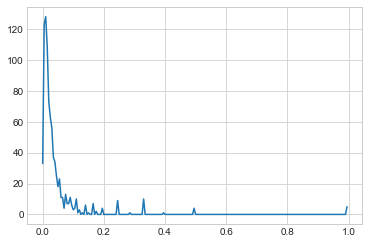

In [67]:
sns.set_style("whitegrid")
a = []
for i in np.arange(0,1,0.005):
    a.append(int(te2[te2>i].count()) - int(te2[te2>i+0.005].count()))
    
plt.plot(np.arange(0,1,0.005), a)
plt.show()

In [24]:
temp = data[['context_page_id','is_trade']].shape #(478138, 2)
(data[['context_page_id']]<=4000).sum()

context_page_id    0
dtype: int64

## 对数据进行预处理一下

In [25]:
print("min is %d"%data[['context_page_id']].min())
print("max is %d"%data[['context_page_id']].max())
# 观察发现值取值在4001-4020间，直接将值减去4000
data[['context_page_id']] = data[['context_page_id']] - 4000
print("min is %d"%data[['context_page_id']].min())
print("max is %d"%data[['context_page_id']].max())

min is 4001
max is 4020
min is 1
max is 20


In [26]:
print("min is %d"%data[['context_timestamp']].min())
print("max is %d"%data[['context_timestamp']].max())
# 观察发现值取值在1537200001-1537804787间，直接将值减去1537200000
data[['context_timestamp']] = data[['context_timestamp']] - 1537200000
print("min is %d"%data[['context_timestamp']].min())
print("max is %d"%data[['context_timestamp']].max())

min is 1537200001
max is 1537804787
min is 1
max is 604787


## 尝试用店铺推测是否购买，制造第一个基本模型分类器

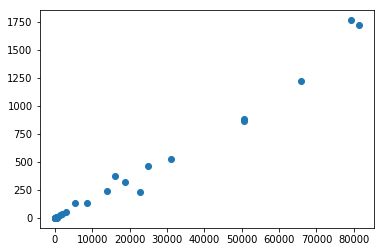

In [7]:
# 对店铺进行分组data[['shop_id','is_trade']].groupby('shop_id').sum()
# 店铺点击数
temp1 = np.array(data[['shop_review_num_level','is_trade']].groupby('shop_review_num_level').sum())
# 店铺购买数
temp2 = np.array(data[['shop_review_num_level','is_trade']].groupby('shop_review_num_level').count())
# plt.xlim(0, 100)
plt.scatter(temp2, temp1)

In [8]:
# 删除异常值
# np.where(temp2 == 11278)#2802
# # temp1[temp2>10000]
# # temp2[temp2>10000]
# temp1 = np.delete(temp1, 2802,axis=0)
# temp2 = np.delete(temp2, 2802,axis=0)
# plt.scatter(temp2, temp1)
# temp2.ravel()

In [9]:
# temp1 = temp2
# temp2 = temp1[temp1<5]


 mu = 19125.52 and sigma = 25530.78



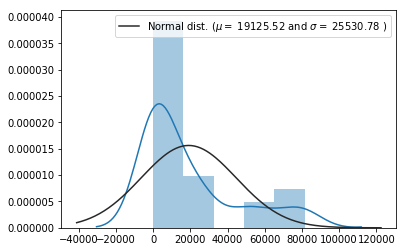

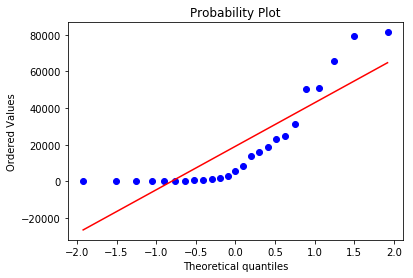

In [10]:
sns.distplot(temp2.ravel() , fit=norm);

# 获取函数使用的拟合参数
# 采用正态分布拟合
(mu, sigma) = norm.fit(temp2.ravel())
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 现在绘制分布图
# plt.xlim(0, 500)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# 绘制QQ-plot 即quantile-quantile Plot 
fig = plt.figure()
res = stats.probplot(temp2.ravel(), plot=plt)

plt.show()


 mu = 7.81 and sigma = 2.92



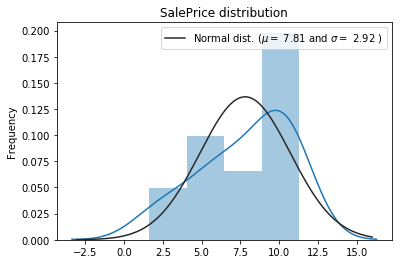

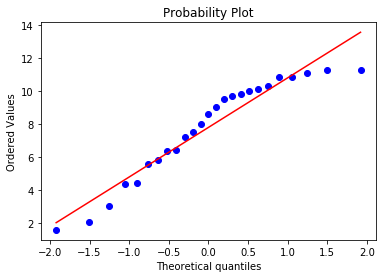

In [11]:
# 我们使用numpy的log1p函数将log（1 + x）应用于SalePrice列的所有元素
temp3 = np.log1p(temp2.ravel())

# 查看新的分布图
sns.distplot(temp3 , fit=norm);

# 获取函数使用的拟合参数
(mu, sigma) = norm.fit(temp3)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 现在绘制这个分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 绘制QQ-plot 即quantile-quantile Plot 
fig = plt.figure()
res = stats.probplot(temp3, plot=plt)
plt.show()


In [49]:
X_data = data[['shop_id','shop_review_num_level',
          'shop_review_positive_rate','shop_star_level','shop_score_service',
         'shop_score_delivery','shop_score_description']].drop_duplicates()
Y = data[['shop_id','is_trade']]
X_data.sort_values(["shop_id"],ascending=True)
pass

In [50]:
temp = (Y.groupby('shop_id').sum()/Y.groupby('shop_id').count())
temp.sort_index(inplace=True) 
# temp
for i in temp.index:
    X_data[['shop_id']] = X_data[['shop_id']].replace(i, float(temp.loc[i]))

In [51]:
# X_data

In [58]:
X_data = np.array(X_data,dtype='float')
Y = X_data[:, 0].ravel()
X = X_data[:, 1:]

In [53]:
# X[:,1] = np.log1p(X[:,3])

In [61]:
# X

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Y_c = Y*1000
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=666)
SS = StandardScaler()
SS.fit(X_train)
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [82]:
ABR = AdaBoostRegressor(n_estimators=500, random_state=666, learning_rate=0.05, base_estimator=DecisionTreeRegressor(max_depth=100))
ABR.fit(X_train, Y_train)
# X_trains

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.05, loss='linear', n_estimators=500,
         random_state=666)

In [83]:
print(ABR.score(X_train, Y_train))
print(ABR.score(X_test, Y_test))
# print(LR.predict(X_test))
# Y_test

0.992288400967
0.309136012924


In [22]:
# item_category_list_all = []
# for i in range(478138):
#     item_category_list_all.append(data[['item_category_list']].iloc[i,0])
    

In [23]:
# data[['item_property_list']].iloc[0,0]

## 对于部分数据无法很好处理，暂时放弃，去除部分数据后进行计算先

In [24]:
X = data[['item_price_level','item_sales_level','item_collected_level',
          'item_pv_level','user_gender_id','user_age_level','user_occupation_id',
          'user_star_level','context_timestamp','context_page_id','shop_review_num_level',
          'shop_review_positive_rate','shop_star_level','shop_score_service',
         'shop_score_delivery','shop_score_description']]
Y = data[['is_trade']]

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
print(X.shape)
print(Y.sum())
print(9021/478138)

(478138, 16)
is_trade    9021
dtype: int64
0.01886693799697995


## 采用各种算法发现数据比例1.8%,倾斜度极大，难以调节算法
## 采用复制购买数来增大比例

In [27]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 666)

In [28]:
# std = StandardScaler()
# std.fit(X_train)
# X_train = std.transform(X_train)
# X_test = std.transform(X_test)

In [29]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# Y_train = np.array(Y_train).ravel()
# Y_test = np.array(Y_test).ravel()

In [30]:
# abc = AdaBoostClassifier(n_estimators=500, random_state=666, learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=500))
# abc.fit(X_train, Y_train)

In [31]:
# temp = abc.predict(X_test)

In [32]:
# temp.sum()

In [33]:
# log_clf = LogisticRegression()
# log_clf.fit(X_train, Y_train)

In [34]:
# log_clf.score(X_train, Y_train)
# log_clf.score(X_test, Y_test)

In [35]:
# from sklearn.externals import joblib
# joblib.dump(abc, 'filename.pkl') 
# clf = joblib.load(‘filename.pkl‘) 

## 加载测试集

In [127]:
data2 = pd.read_table('test.txt',sep=' ',index_col=1) 
data2[['context_page_id']] = data2[['context_page_id']] - 4000
data2[['context_timestamp']] = data2[['context_timestamp']] - 1537200000

In [98]:
X_pre = data2[['shop_id','shop_review_num_level',
          'shop_review_positive_rate','shop_star_level','shop_score_service',
         'shop_score_delivery','shop_score_description']].drop_duplicates()
X_pre = np.array(X_pre,dtype='float')

In [99]:
Y_id = X_pre[:, 0]
X_pre = X_pre[:,1:]
X_pre = SS.transform(X_pre)

In [100]:
# X_pre = np.array(X_pre,dtype='float')

In [112]:
Y_pre = ABR.predict(X_pre)
Y_pre

array([ 0.        ,  0.01923077,  0.0625    , ...,  0.00956938,
        0.        ,  0.        ])

In [115]:
sub = pd.DataFrame()
sub['instance_id'] = Y_id
sub['predicted_score'] = Y_pre
sub.to_csv('submission.csv',index=False)

In [133]:
temp = data2[['shop_id','instance_id']].drop_duplicates()
for i,f in zip(Y_id,Y_pre):
    temp[['shop_id']] = temp[['shop_id']].replace(i, f)
# temp

In [139]:
sub = pd.DataFrame()
sub['instance_id'] = np.array(temp[['instance_id']],dtype='float').ravel()
sub['predicted_score'] = np.array(temp[['shop_id']],dtype='float').ravel()
sub.to_csv('submission.csv',index=False)

In [ ]:
np.array(temp[['shop_star_level','is_trade']].sum()/temp[['shop_star_level','is_trade']].shape[0])
data[['shop_star_level','is_trade']]

## 绘图

In [27]:
(data[['user_occupation_id']]>2001).sum()#477174

user_occupation_id    477174
dtype: int64

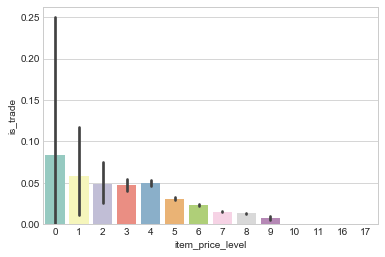

In [28]:
# sns.set_style("whitegrid")
# change = 'item_price_level'
# templist = []
# for i in range(0,int(data[[change]].max())+1):
#     temp = data[(data.item_price_level == i)]
#     temp = np.array(temp[[change,'is_trade']].sum()/temp[[change,'is_trade']].shape[0])
#     templist.append(temp)
# templist = np.array(templist)
# # print(templist)
# plt.plot(templist[:, 0], templist[:, 1])
# plt.show()

sns.barplot(x="item_price_level", y="is_trade", data=data, palette='Set3')


<Container object of 18 artists>

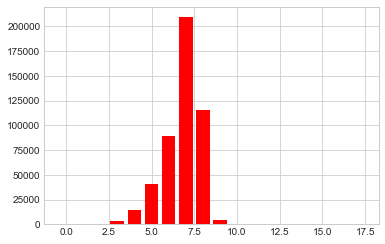

In [29]:
binsdata = np.array(data[[ 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level',  'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level',
       'context_timestamp', 'context_page_id', 
        'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade']], dtype='int')
# binsdata[:,2] = np.log1p(binsdata[:,2])
bins = np.bincount(binsdata[:,0])
plt.bar(range(len(bins)), bins, color='r')

In [13]:
# data.columns
# data[['item_price_level']]

D:\anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:184: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
D:\anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:189: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())



 mu = nan and sigma = nan



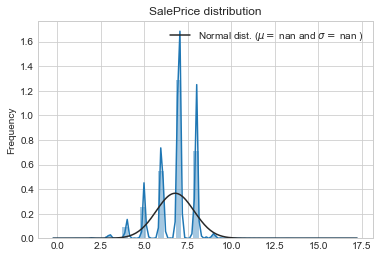

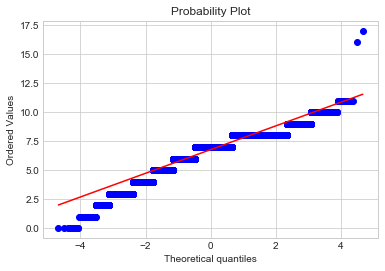

In [16]:
sns.distplot(binsdata[:,0] , fit=norm);

# 获取函数使用的拟合参数
# 采用正态分布拟合
(mu, sigma) = norm.fit(binsdata[: 0])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 现在绘制分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
#中文乱码，因此我在旁边标注
plt.ylabel('Frequency')# 频率，即Y轴为各个价格出现的频率
plt.title('SalePrice distribution')# 销售价格分布图

# 绘制QQ-plot 即quantile-quantile Plot 
fig = plt.figure()
res = stats.probplot(binsdata[:,0], plot=plt)
plt.show()

In [24]:
data[['context_timestamp']].max() - data[['context_timestamp']].min()

context_timestamp    604786
dtype: int64

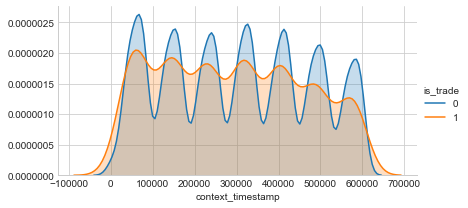

In [29]:
facet = sns.FacetGrid(data, hue="is_trade",aspect=2)
facet.map(sns.kdeplot,'context_timestamp',shade= True)
# facet.set(xlim=(0, 200))
facet.add_legend()

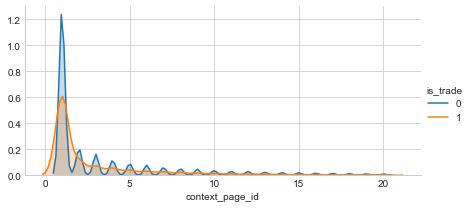

In [9]:
facet = sns.FacetGrid(data, hue="is_trade",aspect=2)
facet.map(sns.kdeplot,'context_page_id',shade= True)
# facet.set(xlim=(0, 200))
facet.add_legend()

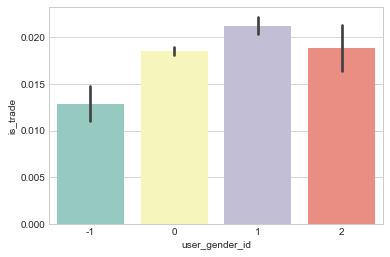

In [10]:
sns.barplot(x="user_gender_id", y="is_trade", data=data, palette='Set3')

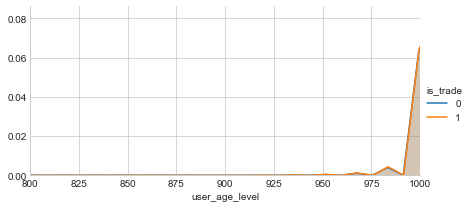

In [11]:
facet = sns.FacetGrid(data, hue="is_trade",aspect=2)
facet.map(sns.kdeplot,'user_age_level',shade= True)
facet.set(xlim=(800, 1000))
facet.add_legend()

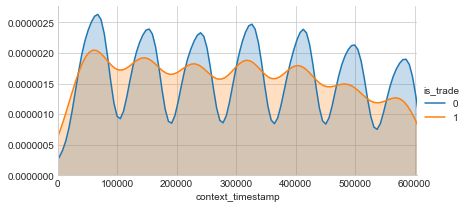

In [12]:
facet = sns.FacetGrid(data, hue="is_trade",aspect=2)
facet.map(sns.kdeplot,'context_timestamp',shade= True)
facet.set(xlim=(data['context_timestamp'].min(), data['context_timestamp'].max()))
facet.add_legend()